In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn import datasets  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
#from sklearn import tree

In [2]:
data=pd.read_csv(r'C:\Users\hp\Downloads\Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [3]:
data.shape

(600, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data[data.duplicated()].sum()

Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

# Visualization And Corelation

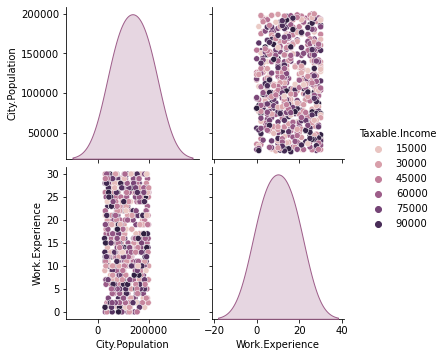

In [28]:
import seaborn as sns
sns.pairplot(data,hue='Taxable.Income')

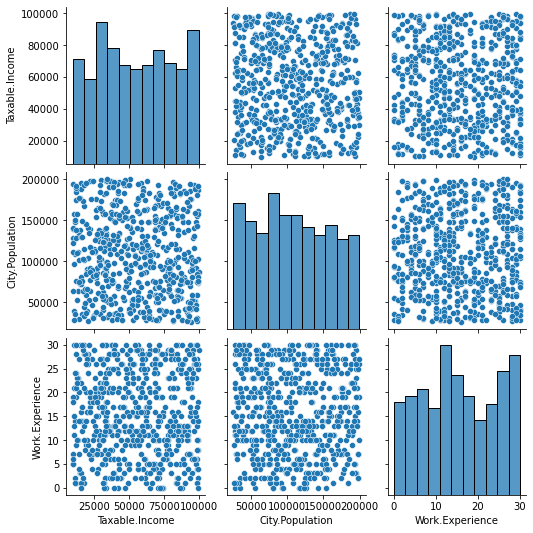

In [29]:
sns.pairplot(data)

In [9]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


# Independent Variable

In [10]:
data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [11]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [12]:
data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [13]:
df=data.copy()

In [14]:
df1 = pd.get_dummies(df, columns = ['Undergrad', 'Marital.Status', 'Urban'])
df1.head()


,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [15]:
df.loc[df["Taxable.Income"] <= 30000,"Tax"]="Risky"
df.loc[df["Taxable.Income"] >= 30000,"Tax"]="Good"
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [16]:
df.shape

(600, 7)

In [18]:
df['Tax'].value_counts()

Good     476
Risky    124
Name: Tax, dtype: int64

In [25]:
lb = LabelEncoder()
datanew = lb.fit_transform(df.Tax)

In [26]:
datanew.shape

(600,)

In [27]:
datanew

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

# Building Preliminary Classification Tree

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df1, datanew, test_size = 0.3, random_state=40)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((420, 10), (420,), (180, 10), (180,))

In [33]:
dtc = DecisionTreeClassifier(random_state = 42)

In [34]:
dtc = dtc.fit(X_train, y_train)

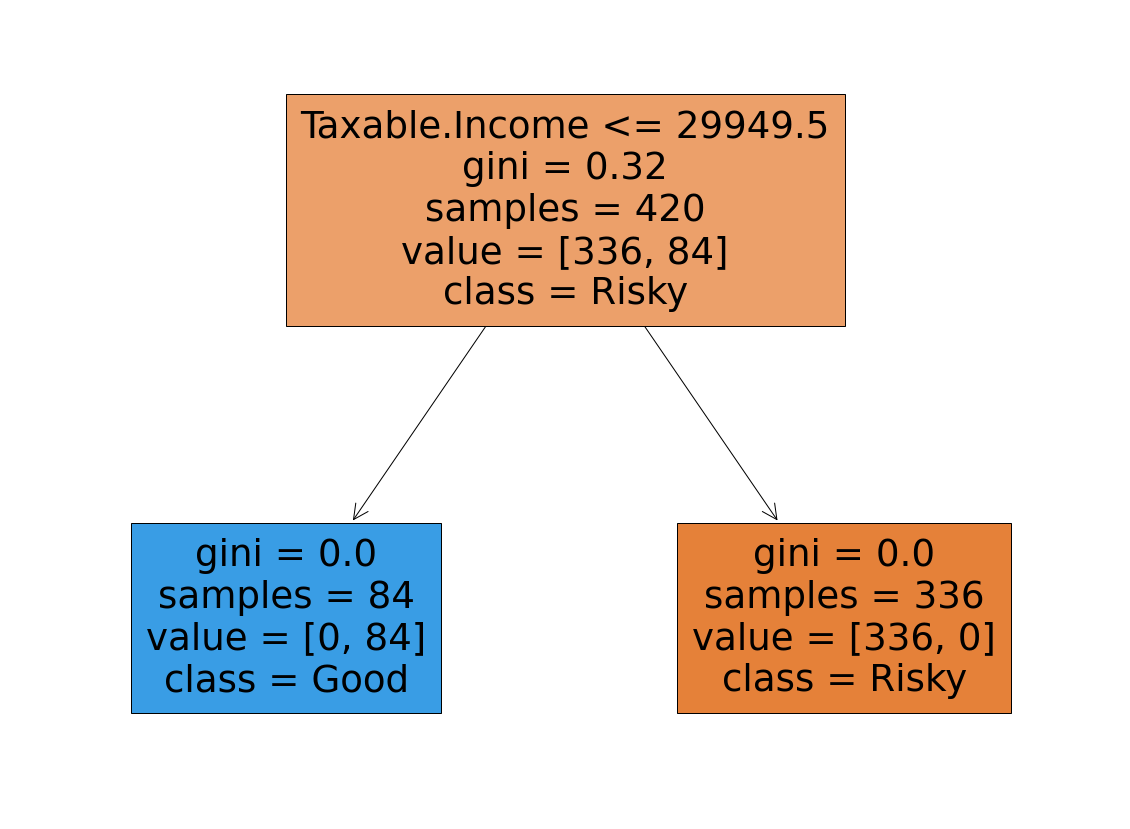

In [46]:
plt.figure(figsize = (20,15))
plot_tree(dtc,
          feature_names =  df1.columns,
          class_names = ['Risky','Good'],
          filled = True)

plt.show()
  


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


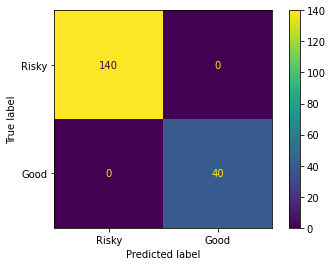

In [49]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test, display_labels = ['Risky','Good'])

In [50]:
dtc.score(X_test, y_test)

1.0

our model is good otherwise it is shown extra overfitting plz tell me so i will corect my model you are obidently student